In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
logins = pd.read_json('logins.json')
ultimate = pd.read_json('ultimate_data_challenge.json')

In [25]:
logins.index =  pd.DatetimeIndex(logins['login_time'])


In [35]:
agg_logins = logins.resample('15T', label='right').count().rename({'login_time':'count'}, axis=1)

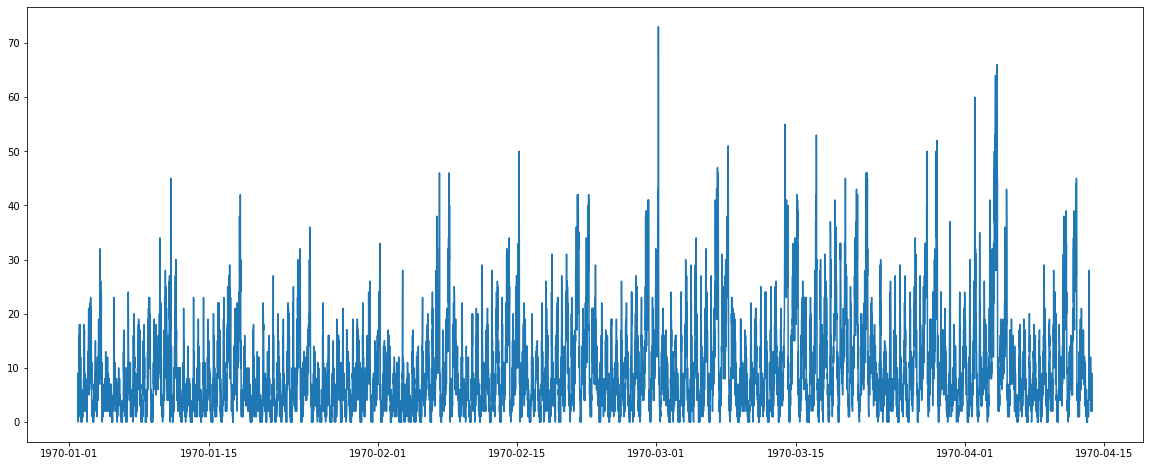

In [41]:
plt.figure(figsize=(20,8))
plt.plot(agg_logins)

(array([5.009e+03, 2.686e+03, 1.231e+03, 5.320e+02, 2.050e+02, 8.300e+01,
        2.800e+01, 6.000e+00, 6.000e+00, 2.000e+00]),
 array([ 0. ,  7.3, 14.6, 21.9, 29.2, 36.5, 43.8, 51.1, 58.4, 65.7, 73. ]),
 <a list of 10 Patch objects>)

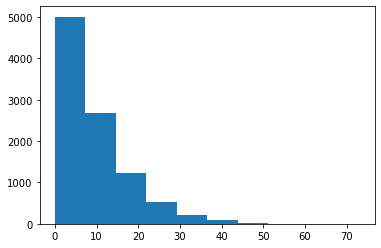

In [44]:
plt.hist(agg_logins['count'])

In [46]:
agg_logins

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1
...,...
1970-04-13 18:00:00,5
1970-04-13 18:15:00,5
1970-04-13 18:30:00,2


In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(agg_logins, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

ValueError: freq T not understood. Please report if you think this is in error.

In [6]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [15]:
logins.resample('15T', on ='login_time', label='right').sum()

IndexError: single positional indexer is out-of-bounds